# Predict the Model 

Here I'll try to compare the 7 models we trained before in "train_model" with test data stored in "data_processing" sector. We'll try to find which model can predict more accurately also comparing with its validation percaentage where it was validated before. by this we can find out which model is overfitting or underfitting or gives us accurate results which one we can take as final model to predict employees performances which can help to hire new employees in the future.

Import Nesseccary Libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
test_data = pd.read_csv('../../data/processed/test_data_scaled.csv')
test_data

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,0.404762,0.0,0.2,1.0,0.6,0.333333,1.0,0.892857,0.75,0.666667,...,0.666667,0.225,0.333333,0.666667,0.225,0.000000,0.066667,0.411765,0.0,3
1,0.761905,0.0,0.4,1.0,1.0,0.722222,0.5,0.392857,0.50,0.666667,...,1.000000,0.400,0.500000,0.666667,0.050,0.111111,0.133333,0.058824,0.0,3
2,0.500000,1.0,0.2,1.0,1.0,0.722222,1.0,0.035714,1.00,0.000000,...,1.000000,0.225,0.500000,0.666667,0.200,0.388889,0.000000,0.411765,0.0,3
3,0.595238,0.0,0.2,0.5,0.2,0.166667,0.5,0.000000,0.50,1.000000,...,0.333333,0.300,0.333333,0.333333,0.125,0.111111,0.133333,0.117647,0.0,3
4,0.452381,0.0,0.2,1.0,0.2,1.000000,1.0,0.000000,0.50,1.000000,...,0.333333,0.425,0.500000,0.666667,0.425,0.666667,0.333333,0.411765,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0.857143,0.0,0.6,0.5,0.4,0.222222,1.0,0.750000,1.00,0.333333,...,0.666667,0.900,1.000000,0.666667,0.250,0.444444,0.266667,0.411765,0.0,2
236,0.309524,1.0,0.2,0.0,1.0,0.444444,1.0,0.214286,0.50,0.666667,...,0.666667,0.250,0.500000,0.333333,0.125,0.222222,0.000000,0.058824,0.0,4
237,0.190476,1.0,0.6,1.0,1.0,0.722222,0.0,1.000000,0.25,0.333333,...,1.000000,0.175,1.000000,0.666667,0.050,0.111111,0.133333,0.117647,1.0,2
238,0.357143,1.0,0.2,0.5,1.0,0.722222,1.0,0.250000,0.75,0.000000,...,1.000000,0.200,1.000000,0.000000,0.050,0.111111,0.133333,0.117647,0.0,2


split feature and target columns

In [3]:
X_test = test_data.drop('PerformanceRating', axis=1)
y_test = test_data['PerformanceRating']

In [4]:
X_test.shape, y_test.shape

((240, 26), (240,))

In [5]:
X_test = X_test.drop(['EmpEducationLevel', 'MaritalStatus', 'Gender', 'BusinessTravelFrequency', 'EmpJobSatisfaction', 'EmpJobInvolvement', 'EmpRelationshipSatisfaction', 'NumCompaniesWorked', 'EducationBackground', 'Age', 'TrainingTimesLastYear','DistanceFromHome'], axis=1)
X_test

,EmpDepartment,EmpJobRole,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobLevel,OverTime,EmpLastSalaryHikePercent,TotalWorkExperienceInYears,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0.6,0.333333,0.666667,0.014286,0.50,1.0,0.357143,0.225,0.666667,0.225,0.000000,0.066667,0.411765,0.0
1,1.0,0.722222,0.666667,0.671429,0.50,0.0,0.000000,0.400,0.666667,0.050,0.111111,0.133333,0.058824,0.0
2,1.0,0.722222,0.000000,0.157143,0.50,0.0,0.500000,0.225,0.666667,0.200,0.388889,0.000000,0.411765,0.0
3,0.2,0.166667,1.000000,0.042857,0.25,0.0,0.142857,0.300,0.333333,0.125,0.111111,0.133333,0.117647,0.0
4,0.2,1.000000,1.000000,0.171429,0.00,0.0,0.071429,0.425,0.666667,0.425,0.666667,0.333333,0.411765,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0.4,0.222222,0.333333,0.871429,0.75,0.0,1.000000,0.900,0.666667,0.250,0.444444,0.266667,0.411765,0.0
236,1.0,0.444444,0.666667,0.200000,0.50,0.0,0.714286,0.250,0.333333,0.125,0.222222,0.000000,0.058824,0.0
237,1.0,0.722222,0.333333,0.700000,0.25,0.0,0.500000,0.175,0.666667,0.050,0.111111,0.133333,0.117647,1.0
238,1.0,0.722222,0.000000,0.228571,0.25,0.0,0.142857,0.200,0.000000,0.050,0.111111,0.133333,0.117647,0.0


# Predict test data with trained model

### **Logistic Regression**

In [6]:
%store -r best_accuracy_logistic_model
%store -r max_accuracy_logistic

##### Predict the Model

In [7]:
logistic_prediction = best_accuracy_logistic_model.predict(X_test)
accuracy_logistic_test = accuracy_score(y_test, logistic_prediction)

print(f" Logistic test Accuracy: {accuracy_logistic_test}")
print(f" Logistic validation Accuracy: {max_accuracy_logistic}")

 Logistic test Accuracy: 0.85
 Logistic validation Accuracy: 0.8385416666666666


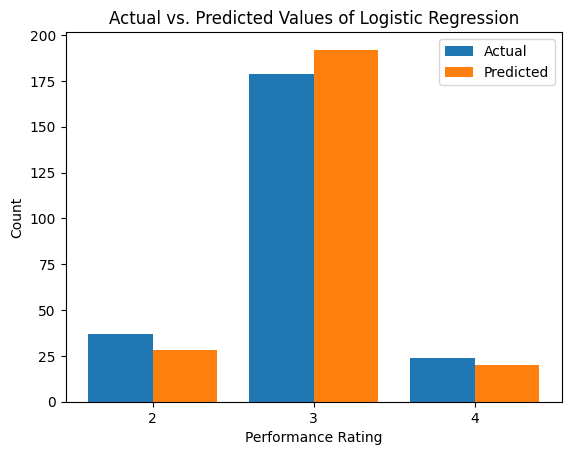

In [8]:
# Get the unique classes present in both y_test and logistic_prediction
unique_classes = np.unique(np.concatenate((y_test, logistic_prediction)))

# Determine the maximum class index observed in either y_test or logistic_prediction
max_class_index = max(np.max(y_test), np.max(logistic_prediction))

# Count the occurrences of each class in actual and predicted values
actual_counts = np.bincount(y_test, minlength=max_class_index + 1)
predicted_counts = np.bincount(logistic_prediction, minlength=max_class_index + 1)

# Plot the bar plot
plt.bar(unique_classes - 0.2, actual_counts[unique_classes], width=0.4, label='Actual')
plt.bar(unique_classes + 0.2, predicted_counts[unique_classes], width=0.4, label='Predicted')

plt.xlabel('Performance Rating')
plt.ylabel('Count')
plt.title('Actual vs. Predicted Values of Logistic Regression')
plt.legend()
plt.xticks(unique_classes)
plt.show()


### **Naive Bayes**

In [9]:
%store -r best_accuracy_nb_model
%store -r max_accuracy_nb

##### Predict the Model

In [10]:
nb_prediction = best_accuracy_nb_model.predict(X_test)
accuracy_nb_test = accuracy_score(y_test, nb_prediction)

print(f" Naive Bayes test Accuracy: {accuracy_nb_test}")
print(f" Naive Bayes validation Accuracy: {max_accuracy_nb}")

 Naive Bayes test Accuracy: 0.7458333333333333
 Naive Bayes validation Accuracy: 0.7760416666666666


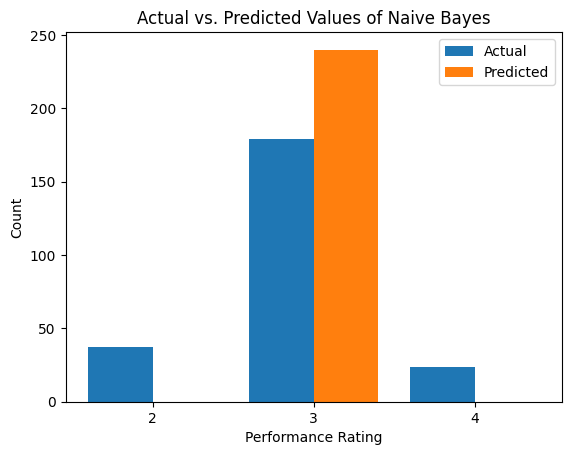

In [11]:
# Get the unique classes present in both y_test and nb_prediction
unique_classes = np.unique(np.concatenate((y_test, nb_prediction)))

# Determine the maximum class index observed in either y_test or nb_prediction
max_class_index = max(np.max(y_test), np.max(nb_prediction))

# Count the occurrences of each class in actual and predicted values
actual_counts = np.bincount(y_test, minlength=max_class_index + 1)
predicted_counts = np.bincount(nb_prediction, minlength=max_class_index + 1)

# Plot the bar plot
plt.bar(unique_classes - 0.2, actual_counts[unique_classes], width=0.4, label='Actual')
plt.bar(unique_classes + 0.2, predicted_counts[unique_classes], width=0.4, label='Predicted')

plt.xlabel('Performance Rating')
plt.ylabel('Count')
plt.title('Actual vs. Predicted Values of Naive Bayes')
plt.legend()
plt.xticks(unique_classes)
plt.show()



### **SVM Classifier**

In [12]:
%store -r best_accuracy_svm_model
%store -r max_accuracy_svm

##### Predict the Model

In [13]:
svm_prediction = best_accuracy_svm_model.predict(X_test)
accuracy_svm_test = accuracy_score(y_test, svm_prediction)

print(f" SVM test Accuracy: {accuracy_svm_test}")
print(f" SVM validation Accuracy: {max_accuracy_svm}")

 SVM test Accuracy: 0.8416666666666667
 SVM validation Accuracy: 0.8489583333333334


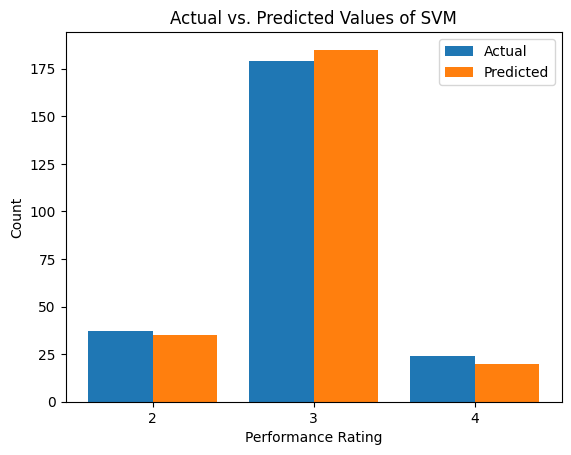

In [14]:
# Get the unique classes present in both y_test and svm_prediction
unique_classes = np.unique(np.concatenate((y_test, svm_prediction)))

# Determine the maximum class index observed in either y_test or svm_prediction
max_class_index = max(np.max(y_test), np.max(svm_prediction))

# Count the occurrences of each class in actual and predicted values
actual_counts = np.bincount(y_test, minlength=max_class_index + 1)
predicted_counts = np.bincount(svm_prediction, minlength=max_class_index + 1)

# Plot the bar plot
plt.bar(unique_classes - 0.2, actual_counts[unique_classes], width=0.4, label='Actual')
plt.bar(unique_classes + 0.2, predicted_counts[unique_classes], width=0.4, label='Predicted')

plt.xlabel('Performance Rating')
plt.ylabel('Count')
plt.title('Actual vs. Predicted Values of SVM')
plt.legend()
plt.xticks(unique_classes)
plt.show()



### **KNN**

In [15]:
%store -r best_accuracy_knn_model
%store -r max_accuracy_knn

##### Predict the Model

In [16]:
knn_prediction = best_accuracy_knn_model.predict(X_test)
accuracy_knn_test = accuracy_score(y_test, knn_prediction)

print(f" KNN test Accuracy: {accuracy_knn_test}")
print(f" KNN validation Accuracy: {max_accuracy_knn}")

 KNN test Accuracy: 0.8041666666666667
 KNN validation Accuracy: 0.8333333333333334


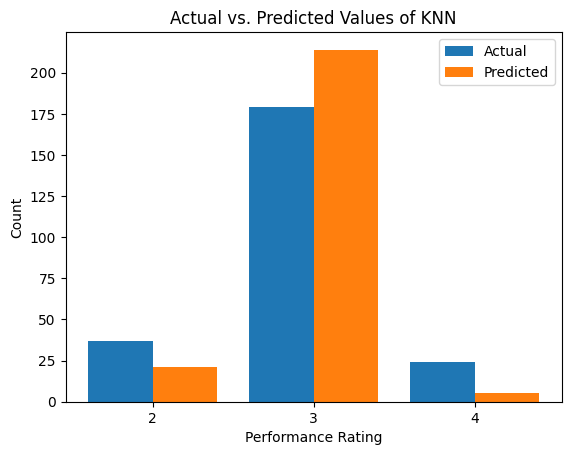

In [17]:
# Get the unique classes present in both y_test and knn_prediction
unique_classes = np.unique(np.concatenate((y_test, knn_prediction)))

# Determine the maximum class index observed in either y_test or knn_prediction
max_class_index = max(np.max(y_test), np.max(knn_prediction))

# Count the occurrences of each class in actual and predicted values
actual_counts = np.bincount(y_test, minlength=max_class_index + 1)
predicted_counts = np.bincount(knn_prediction, minlength=max_class_index + 1)

# Plot the bar plot
plt.bar(unique_classes - 0.2, actual_counts[unique_classes], width=0.4, label='Actual')
plt.bar(unique_classes + 0.2, predicted_counts[unique_classes], width=0.4, label='Predicted')

plt.xlabel('Performance Rating')
plt.ylabel('Count')
plt.title('Actual vs. Predicted Values of KNN')
plt.legend()
plt.xticks(unique_classes)
plt.show()


### **Random Forest Classifier**

In [18]:
%store -r best_accuracy_rfc_model
%store -r max_accuracy_rfc

##### Predict the Model

In [19]:
rfc_prediction = best_accuracy_rfc_model.predict(X_test)
accuracy_rfc_test = accuracy_score(y_test, rfc_prediction)

print(f" Random Forest test Accuracy: {accuracy_rfc_test}")
print(f" Random Forest validation Accuracy: {max_accuracy_rfc}")

 Random Forest test Accuracy: 0.9375
 Random Forest validation Accuracy: 0.9427083333333334


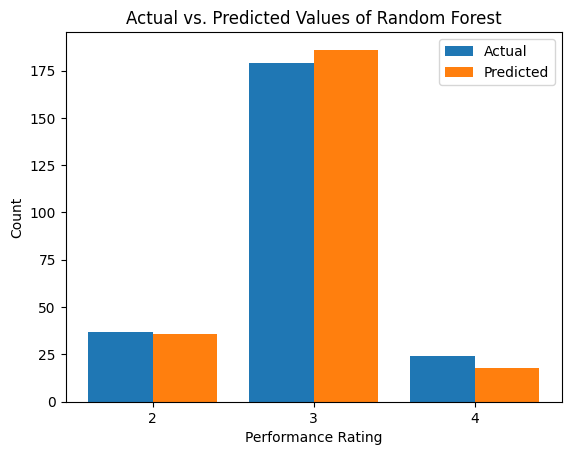

In [20]:
# Get the unique classes present in both y_test and rfc_prediction
unique_classes = np.unique(np.concatenate((y_test, rfc_prediction)))

# Determine the maximum class index observed in either y_test or rfc_prediction
max_class_index = max(np.max(y_test), np.max(rfc_prediction))

# Count the occurrences of each class in actual and predicted values
actual_counts = np.bincount(y_test, minlength=max_class_index + 1)
predicted_counts = np.bincount(rfc_prediction, minlength=max_class_index + 1)

# Plot the bar plot
plt.bar(unique_classes - 0.2, actual_counts[unique_classes], width=0.4, label='Actual')
plt.bar(unique_classes + 0.2, predicted_counts[unique_classes], width=0.4, label='Predicted')

plt.xlabel('Performance Rating')
plt.ylabel('Count')
plt.title('Actual vs. Predicted Values of Random Forest')
plt.legend()
plt.xticks(unique_classes)
plt.show()



### **Gradient Boosting Classifier**

In [21]:
%store -r best_accuracy_gbc_model
%store -r max_accuracy_gbc

##### Predict the Model

In [22]:
gbc_prediction = best_accuracy_gbc_model.predict(X_test)
accuracy_gbc_test = accuracy_score(y_test, gbc_prediction)

print(f" Gradient Boosting test Accuracy: {accuracy_gbc_test}")
print(f" Gradient Boosting validation Accuracy: {max_accuracy_gbc}")

 Gradient Boosting test Accuracy: 0.9291666666666667
 Gradient Boosting validation Accuracy: 0.921875


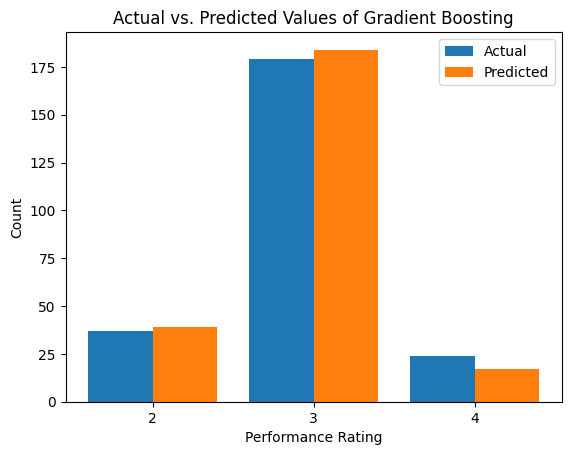

In [23]:
# Get the unique classes present in both y_test and gbc_prediction
unique_classes = np.unique(np.concatenate((y_test, gbc_prediction)))

# Determine the maximum class index observed in either y_test or gbc_prediction
max_class_index = max(np.max(y_test), np.max(gbc_prediction))

# Count the occurrences of each class in actual and predicted values
actual_counts = np.bincount(y_test, minlength=max_class_index + 1)
predicted_counts = np.bincount(gbc_prediction, minlength=max_class_index + 1)

# Plot the bar plot
plt.bar(unique_classes - 0.2, actual_counts[unique_classes], width=0.4, label='Actual')
plt.bar(unique_classes + 0.2, predicted_counts[unique_classes], width=0.4, label='Predicted')

plt.xlabel('Performance Rating')
plt.ylabel('Count')
plt.title('Actual vs. Predicted Values of Gradient Boosting')
plt.legend()
plt.xticks(unique_classes)
plt.show()


### **Decision Tree Classifier**

In [24]:
%store -r best_accuracy_dt_model
%store -r max_accuracy_dt

##### Predict the Model

In [25]:
dt_prediction = best_accuracy_dt_model.predict(X_test)
accuracy_dt_test = accuracy_score(y_test, dt_prediction)

print(f" Decision Tree test Accuracy: {accuracy_dt_test}")
print(f" Decision Tree validation Accuracy: {max_accuracy_dt}")

 Decision Tree test Accuracy: 0.8375
 Decision Tree validation Accuracy: 0.8489583333333334


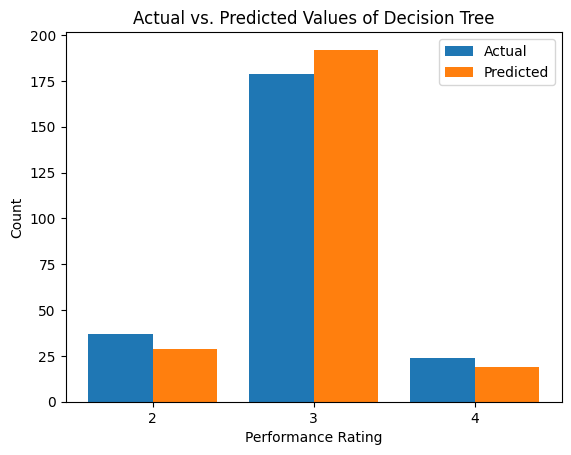

In [26]:
# Get the unique classes present in both y_test and dt_prediction
unique_classes = np.unique(np.concatenate((y_test, dt_prediction)))

# Determine the maximum class index observed in either y_test or dt_prediction
max_class_index = max(np.max(y_test), np.max(dt_prediction))

# Count the occurrences of each class in actual and predicted values
actual_counts = np.bincount(y_test, minlength=max_class_index + 1)
predicted_counts = np.bincount(dt_prediction, minlength=max_class_index + 1)

# Plot the bar plot
plt.bar(unique_classes - 0.2, actual_counts[unique_classes], width=0.4, label='Actual')
plt.bar(unique_classes + 0.2, predicted_counts[unique_classes], width=0.4, label='Predicted')

plt.xlabel('Performance Rating')
plt.ylabel('Count')
plt.title('Actual vs. Predicted Values of Decision Tree')
plt.legend()
plt.xticks(unique_classes)
plt.show()



### Comparing Models

In [27]:
# Models and their corresponding scores
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'Gradient Boosting']
validation_scores = [max_accuracy_logistic, max_accuracy_dt, max_accuracy_rfc, max_accuracy_svm, max_accuracy_knn, max_accuracy_nb, max_accuracy_gbc]
test_scores = [accuracy_logistic_test, accuracy_dt_test, accuracy_rfc_test, accuracy_svm_test, accuracy_knn_test, accuracy_nb_test, accuracy_gbc_test]

# Sort the test scores and corresponding models in descending order
sorted_indices = sorted(range(len(test_scores)), key=lambda i: test_scores[i], reverse=True)
sorted_test_scores = [test_scores[i] for i in sorted_indices]
sorted_models = [models[i] for i in sorted_indices]

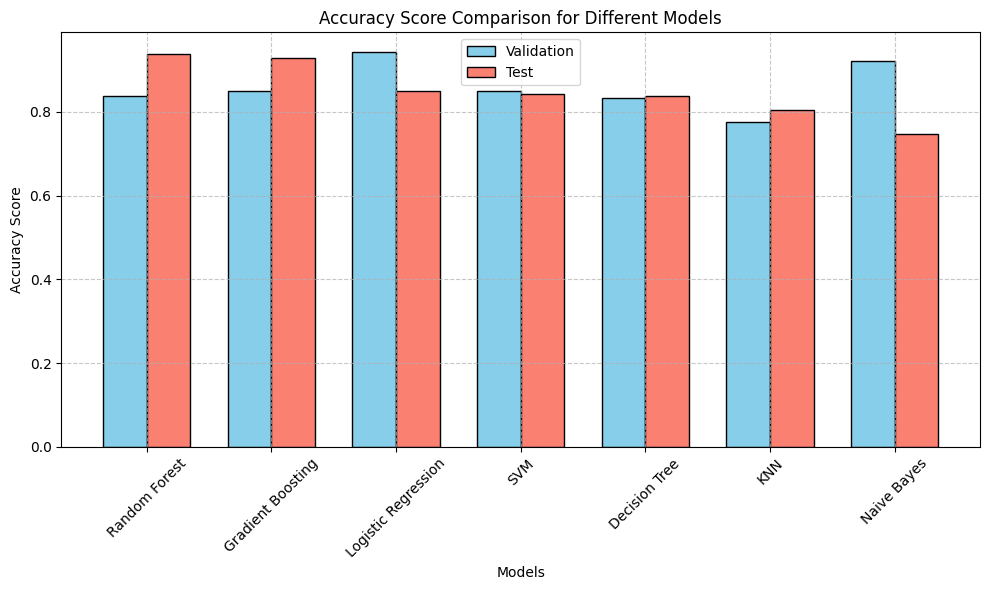

In [28]:
bar_width = 0.35
index = range(len(sorted_models))

plt.figure(figsize=(10, 6))

plt.bar(index, validation_scores, bar_width, label='Validation', color='skyblue', edgecolor='black')
plt.bar([i + bar_width for i in index], sorted_test_scores, bar_width, label='Test', color='salmon', edgecolor='black')

plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score Comparison for Different Models')
plt.xticks([i + bar_width / 2 for i in index], sorted_models, rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [29]:
model_accuracy = pd.DataFrame([accuracy_logistic_test, accuracy_dt_test, accuracy_rfc_test, accuracy_svm_test, accuracy_knn_test, accuracy_nb_test, accuracy_gbc_test],
                              index = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'Gradient Boosting'],
                              columns= ['Accuracy'])

model_accuracy = model_accuracy.sort_values('Accuracy', ascending = False)

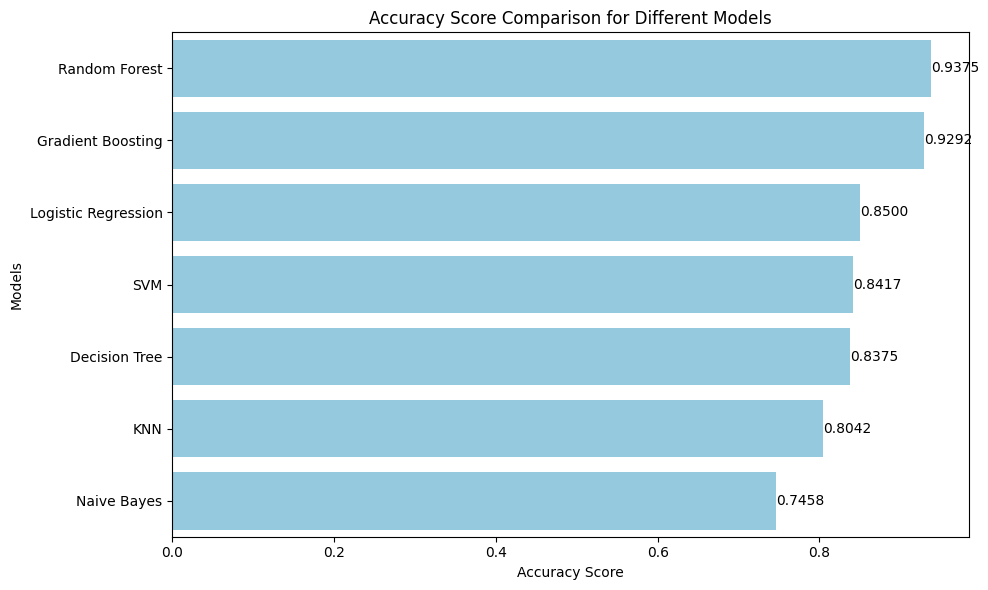

In [32]:
# Create subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Create bar plot for accuracy
sns.barplot(x=model_accuracy.Accuracy, y=model_accuracy.index, color='skyblue', ax=ax1)

# Add accuracy values on the bars
for i in range(model_accuracy.shape[0]):
    ax1.text(model_accuracy.iloc[i]['Accuracy'], i, f'{model_accuracy.iloc[i]["Accuracy"]:.4f}', va='center')

# Add labels and title
ax1.set_xlabel('Accuracy Score')
ax1.set_ylabel('Models')
ax1.set_title('Accuracy Score Comparison for Different Models')

plt.tight_layout()
plt.show()

## A trained model which can predict the employee performance based on factors as inputs. This will be used to hire employees

From predicting with multiple models we've got 

- **Random Forest and Gradient Boosting models** are giving maximum accuracy level with **93.75% and 92.92%**

- **Naive Bayes** is producing **lowest accuracy** score with **74.58%**
- **Logistic Regression and SVM** models are producing moderate level accuracy among others with **85% and 84.17%**

- If we see training and validation comparisons, we can clearly see **Random Forest is doing best prediction at their actual test data compared to validation data during their period.** 

Hence, we'll take **Random Forest**  model which can predict the employee performance based on factors as inputs. This will be used to hire employees